In [1]:
%reset
import numpy as np
import pandas as pd

air    =    np.array([80, 62,62,62,62, 58,58,58,58,58,58, 50,50,50,50,50, 56])
water  =    np.array([27,    22,    23,    24,    24,    23,    18,    18,    17,    18,    19,    18,    18,
19,    19,    20,    20])
acid    =    np.array([88,    87,    87,    93,    93,    87,    80,    89,    88,    82,    93,    89,    86,
72,    79,    80,    82])
stack   =    np.array([37,    18,    18,    19,    20,    15,    14,    14,    13,    11,    12,    8,    7,    8,
8,    9,    15])

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [2]:
# create a df from the variables

df = pd.DataFrame({'air':air, 'water':water,'acid':acid,'stack':stack})
#df

In [3]:
#Fit the OLS regression surface model

from statsmodels.formula.api import ols

# Creating the linear model, produce the fit, and print out the summmary of the regression model
model=ols('stack~air+water+acid',data=df)
results=model.fit()
print(results.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.969   
Dependent Variable: stack            AIC:                59.3440 
Date:               2024-02-09 13:48 BIC:                62.6769 
No. Observations:   17               Log-Likelihood:     -25.672 
Df Model:           3                F-statistic:        169.0   
Df Residuals:       13               Prob (F-statistic): 1.16e-10
R-squared:          0.975            Scale:              1.5693  
------------------------------------------------------------------
            Coef.    Std.Err.     t     P>|t|    [0.025    0.975] 
------------------------------------------------------------------
Intercept  -37.6525    4.7321  -7.9569  0.0000  -47.8754  -27.4295
air          0.7977    0.0674  11.8282  0.0000    0.6520    0.9434
water        0.5773    0.1660   3.4786  0.0041    0.2188    0.9359
acid        -0.0671    0.0616  -1.0886  0.2961   -0.2001    0.0660
--------------------

C:\Users\carol\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [4]:
print("The regression equation is")
print("stack =",f'{results.params["Intercept"]:.3}' ,"+",f'{results.params["air"]:.3}',"air","+",f'{results.params["water"]:.3}',"water","+",f'{results.params["acid"]:.3}',"acid")

The regression equation is
stack = -37.7 + 0.798 air + 0.577 water + -0.0671 acid


In [5]:
# prodcue the ANOVA table

from statsmodels.stats.anova import anova_lm

anova_results = anova_lm(results)
print(anova_results)

            df      sum_sq     mean_sq           F        PR(>F)
air        1.0  775.482188  775.482188  494.160440  9.969916e-12
water      1.0   18.492672   18.492672   11.784083  4.452801e-03
acid       1.0    1.859634    1.859634    1.185015  2.961071e-01
Residual  13.0   20.400800    1.569292         NaN           NaN


In [6]:
x1_sqr=np.square(df['air'])
df['air_sqr']=x1_sqr

In [7]:
model1=ols('stack~air+water+air_sqr',data=df)
results1=model1.fit()
print(results1.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.975   
Dependent Variable: stack            AIC:                55.6746 
Date:               2024-02-09 13:48 BIC:                59.0074 
No. Observations:   17               Log-Likelihood:     -23.837 
Df Model:           3                F-statistic:        210.8   
Df Residuals:       13               Prob (F-statistic): 2.85e-11
R-squared:          0.980            Scale:              1.2646  
------------------------------------------------------------------
             Coef.    Std.Err.     t     P>|t|    [0.025    0.975]
------------------------------------------------------------------
Intercept   -15.4093   12.6027  -1.2227  0.2431  -42.6357  11.8171
air          -0.0691    0.3984  -0.1735  0.8649   -0.9299   0.7916
water         0.5278    0.1501   3.5168  0.0038    0.2036   0.8520
air_sqr       0.0068    0.0032   2.1453  0.0514   -0.0000   0.0137
--------------------

C:\Users\carol\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [8]:
# importing the required library for plotting
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
%matplotlib widget
from mpl_toolkits.mplot3d import Axes3D

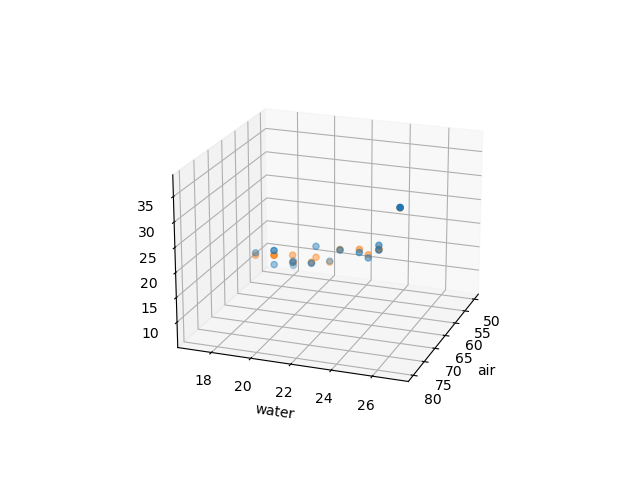

In [10]:
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')

xSP=df['air']
ySP=df['water']
zSP=df['stack']
plt.xlabel("air")
plt.ylabel("water")

ax.scatter(xSP,ySP,zSP)
ax.view_init(elev=20,azim=20)

ax.scatter(xSP.values,ySP.values,results1.fittedvalues.values)

In [11]:
water16=np.full(17,16)
water20=np.full(17,20)
water24=np.full(17,24)
water28=np.full(17,28)

In [12]:
prediction16 = results1.get_prediction(exog=dict(air=df['air'],water=water16,air_sqr=df['air_sqr'])) 
#prediction16.summary_frame(alpha=0.05)
prediction20 = results1.get_prediction(exog=dict(air=df['air'],water=water20,air_sqr=df['air_sqr'])) 
prediction24 = results1.get_prediction(exog=dict(air=df['air'],water=water24,air_sqr=df['air_sqr'])) 
prediction28 = results1.get_prediction(exog=dict(air=df['air'],water=water28,air_sqr=df['air_sqr'])) 

In [13]:
#dir(prediction16)

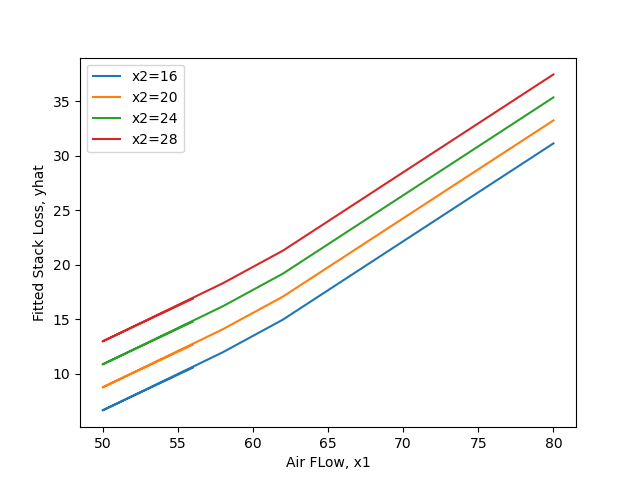

In [14]:
# importing the required library for plotting
import matplotlib.pyplot as plt

# Plot the Least Squares Polynomial regression plot

fig, ax = plt.subplots()

plt.plot(df['air'], prediction16.predicted,label='x2=16')
plt.plot(df['air'], prediction20.predicted,label='x2=20')
plt.plot(df['air'], prediction24.predicted,label='x2=24')
plt.plot(df['air'], prediction28.predicted,label='x2=28')
plt.xlabel("Air FLow, x1")
plt.ylabel("Fitted Stack Loss, yhat")
plt.legend()

C:\Users\carol\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\carol\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0, 0.5, 'Water temperature, x2')

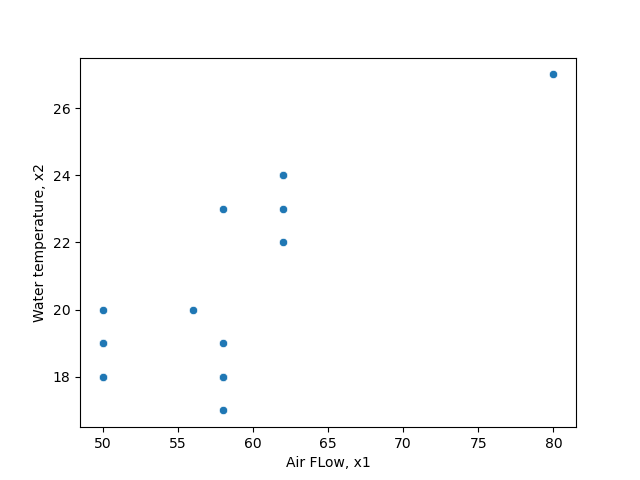

In [20]:
# Plot of (x1,x2) pairs showing outlier

fig, ax = plt.subplots()

sns.scatterplot(x=df['air'], y=df['water'])
plt.xlabel("Air FLow, x1")
plt.ylabel("Water temperature, x2")